## Arbitrary value imputation

- Replace all occurences of missing value within a variable with an **arbitrary value**.

- Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive). The point is we impute with a value that is different from most values in the distribution, as using other value may make it close to the median, and that is no different than median imputation. Tip: * find the variable value range. * Then, pick a value outside that range.

- For categorical, "missing" can be used.

#### Assumptions

- Data is **not missing at random**

- We **flag** the missing value with a value that is different from most other values in the distribution.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.3
RANDOM_STATE = 44

In [1]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice"
]

In [4]:
data = pd.read_csv("../data/houseprice.csv", usecols=cols_to_use)
data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [6]:
# Split data to train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [7]:
X_train.isna().mean()

LotFrontage    0.197652
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.045010
WoodDeckSF     0.000000
dtype: float64

* LotFrontage has nearly 20% of missing data

In [8]:
# capture the variables to impute.
vars_to_impute = [var for var in X_train.columns if X_train[var].isna().sum() > 0]
vars_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

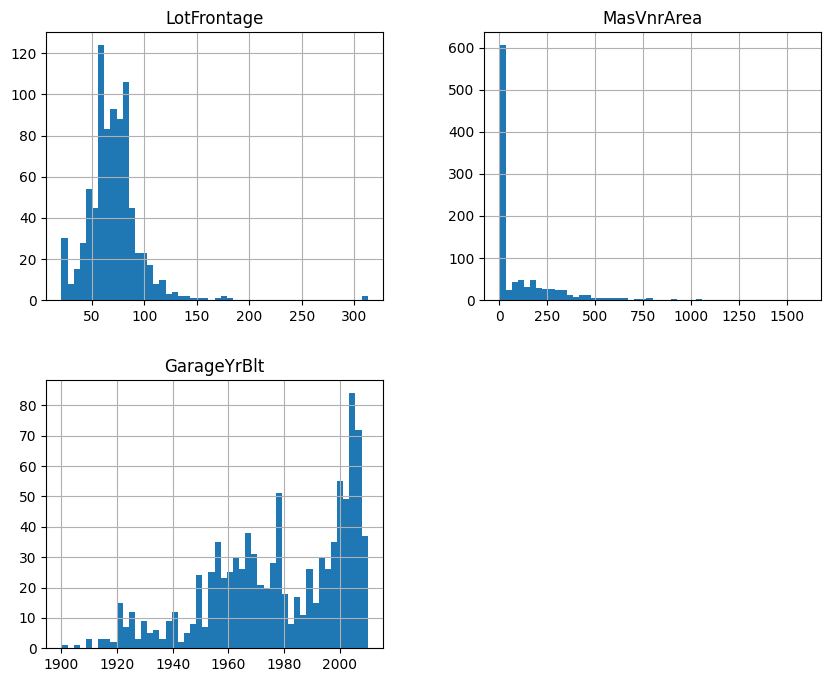

In [9]:
# Plot the distribution of those variables
X_train[vars_to_impute].hist(bins=50, figsize=(10,8))
plt.show()

In [10]:
X_train[vars_to_impute].agg(["min", "max"])

,LotFrontage,MasVnrArea,GarageYrBlt
min,21.0,0.0,1900.0
max,313.0,1600.0,2010.0


In [11]:
# Dict of imputation values
imputation_dict = {
    'LotFrontage': 999, 
    'MasVnrArea': 1999, 
    'GarageYrBlt': 2999
}
imputation_dict

{'LotFrontage': 999, 'MasVnrArea': 1999, 'GarageYrBlt': 2999}

In [12]:
# replace missing data
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

In [13]:
X_train.isna().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

In [14]:
X_test.isna().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

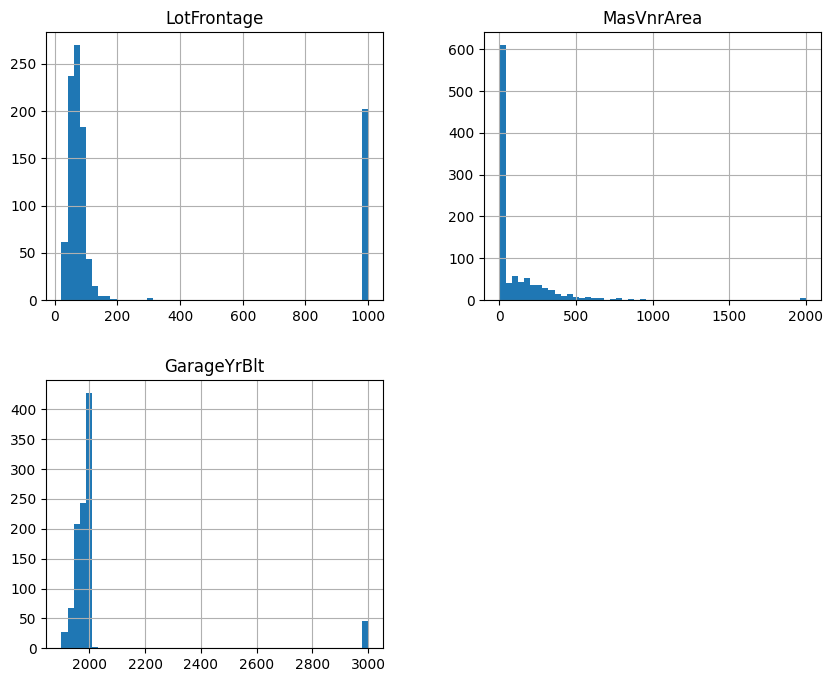

In [15]:
X_train[vars_to_impute].hist(bins=50, figsize=(10,8))
plt.show()

Imputation result has significantly impact the distribution of variables. Expescially for `LotFrontage`, where missing values are approximately 20%.